usando apenas os atributos do MLCQ (math com organic)


Alterado em 01/03/2023 para rodar local e nao mais no colab

In [10]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression

# Seed para reprodução de resultados
seed = 10
random.seed(seed)
np.random.seed(seed)

In [18]:
import os
path = "P:/Meu Drive/22.2/EngSoft-Juliana/trabalho/"
os.chdir(path)

In [20]:

#workdir_path = os.path.join(path, 'final/')
#os.chdir(workdir_path)

In [2]:
##Montar o drive
#from google.colab import drive
#drive.mount('/content/drive')

#import os
#workdir_path = '/content/drive/My Drive/16-Mestrado/22.2/EngSoft-Juliana' #MODIFICAR!!! #Caminho para o seu workspace
#os.chdir(workdir_path)

Mounted at /content/drive


# Pegando o csv já salvo 


new_dataset.2023.01.05-alternativa01-opcao02.csv

Registros 100% coincidentes com hash + smell 
		'start_line'] in range(start-10,start+10)) & (
		'end_line’]   in range(end-10,end+10):

		
		711 (407 long method e 304 feature envy)

# Nova analise exploratoria do mlcq com os dados do organica

In [21]:
#dataset_old = pd.read_csv("organic.2023.01.05-alternativa01-opcao02.csv", sep=',')
dataset = pd.read_csv("organic.2023.02.01-alternativa01-opcao02-agglom.csv", sep=',')

In [ ]:
#dataset_old.columns

In [23]:
dataset.columns

Index(['commit_hash', 'sample_id', 'reviewer_id', 'smell', 'severity',
       'review_timestamp', 'type', 'code_name', 'repository', 'path',
       'start_line', 'end_line', 'link', 'relevant', 'lines', 'agglom_num',
       'agglom_list', 'num_commits', 'reason', 'NumberOfAccessedVariables',
       'CouplingDispersion', 'ChangingClasses', 'MethodLinesOfCode',
       'CyclomaticComplexity', 'MaxNesting', 'CouplingIntensity',
       'ParameterCount', 'MaxCallChain', 'ChangingMethods', 'repeticoes',
       'arquivo'],
      dtype='object')

In [24]:
dataset.drop(columns='path',inplace=True)

In [25]:
dataset.shape

(14739, 30)

In [26]:
dataset.describe()

,sample_id,reviewer_id,start_line,end_line,lines,agglom_num,num_commits,NumberOfAccessedVariables,CouplingDispersion,ChangingClasses,MethodLinesOfCode,CyclomaticComplexity,MaxNesting,CouplingIntensity,ParameterCount,MaxCallChain,ChangingMethods,repeticoes
count,1.473900e+04,14739.000000,14739.000000,14739.000000,14739.000000,14739.000000,14739.000000,711.000000,711.000000,702.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,702.000000,711.000000
mean,6.597182e+06,8.526019,2270.629690,2375.736074,106.106384,0.711039,95.731529,13.122363,0.502280,0.508547,33.064698,8.327707,2.060478,8.115331,1.303797,2.572433,0.880342,1.796062
std,1.666133e+06,7.301026,15319.330212,15320.249495,254.282762,0.765500,90.363547,9.538385,0.282094,0.683459,19.289895,7.978373,2.376647,8.514821,1.589747,1.883217,1.680614,0.870024
min,3.698323e+06,1.000000,2.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.183069e+06,3.000000,34.000000,82.000000,11.000000,0.000000,30.000000,7.000000,0.312500,0.000000,18.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,6.632851e+06,5.000000,69.000000,170.000000,31.000000,1.000000,68.000000,12.000000,0.500000,0.000000,32.000000,6.000000,1.000000,6.000000,1.000000,2.000000,0.000000,2.000000
75%,7.944953e+06,15.000000,257.000000,426.000000,89.000000,1.000000,146.000000,17.000000,0.692308,1.000000,39.000000,13.000000,3.000000,11.000000,2.000000,3.000000,1.000000,2.000000
max,9.553496e+06,34.000000,252554.000000,252655.000000,4111.000000,2.000000,424.000000,54.000000,1.000000,4.000000,105.000000,39.000000,19.000000,63.000000,9.000000,21.000000,19.000000,4.000000


In [27]:
dataset.head()

,commit_hash,sample_id,reviewer_id,smell,severity,review_timestamp,type,code_name,repository,start_line,...,ChangingClasses,MethodLinesOfCode,CyclomaticComplexity,MaxNesting,CouplingIntensity,ParameterCount,MaxCallChain,ChangingMethods,repeticoes,arquivo
0,114c412afbfba24ffb4fbc804e5308a823a16a78,5771277,6,none,none,2019-03-27 10:34:53.041496,function,org.apache.syncope.client.ui.commons.ConnIdSpe...,git@github.com:apache/syncope.git,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,114c412afbfba24ffb4fbc804e5308a823a16a78,5771277,6,none,none,2019-03-27 10:34:53.042443,function,org.apache.syncope.client.ui.commons.ConnIdSpe...,git@github.com:apache/syncope.git,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d5675c332497c1ac1dedefdf91e87476b5c0d7a9,5786929,6,blob,critical,2019-03-27 10:37:38.107923,class,org.apache.tez.runtime.library.common.writers....,git@github.com:apache/tez.git,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d5675c332497c1ac1dedefdf91e87476b5c0d7a9,5786929,6,data class,critical,2019-03-27 10:37:38.109068,class,org.apache.tez.runtime.library.common.writers....,git@github.com:apache/tez.git,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4131c6e30f2e0eb1feb85e0f7576531d4e830468,5788107,6,none,none,2019-03-27 10:37:49.627100,function,org.apache.tika.parser.ocr.TesseractOCRConfig#...,git@github.com:apache/tika.git,531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fazendo a figura para o artigo

In [31]:
artigo_lista = dataset['severity'] == 'none'
artigo_dataset = dataset[~artigo_lista]
artigo_dataset.shape

(3291, 30)

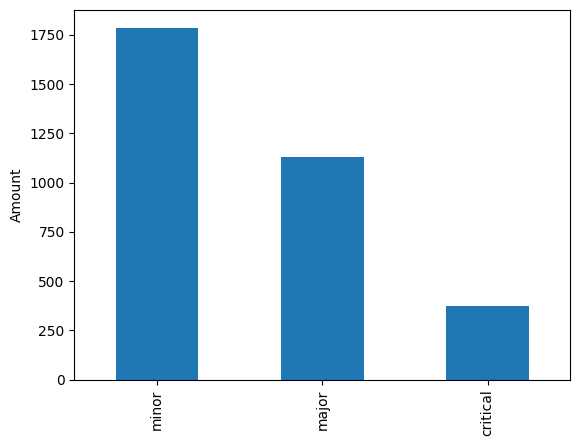

In [34]:
#plt.xlabel("\nFig.2 code Smell Severity")
plt.ylabel("Amount")
#plt.title("Severity")
artigo_dataset['severity'].value_counts().plot.bar() #;
plt.show()

Aqui continua como antes

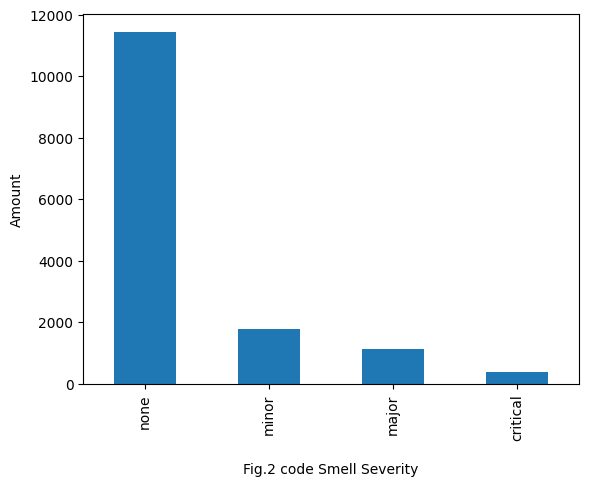

In [35]:
plt.xlabel("\nFig.2 code Smell Severity")
plt.ylabel("Amount")
#plt.title("Severity")
dataset['severity'].value_counts().plot.bar() #;
plt.show()

# Criando o atributo reviewer e reviewer_cod


reviewer só será usado para o gráfico
reviewer será introduzido na análise 

In [36]:
dataset['reviewer_cod'] = ''
dataset['reviewer'] = ''

In [37]:
dataset.shape

(14739, 32)

In [38]:
reviewer = {34:'unknown', 31:'unknown', 30:'unknown', 21:'unknown', 28:'unknown', 18:'unknown', 1: 'Middle',3: 'Middle',4: 'Senior',5: 'Junior',6: 'Junior',7: 'Junior',8: 'Junior',9: 'Junior',10:'Middle',11:'Junior',12:'Middle',13:'Junior',14:'Middle',15:'Junior',16:'Junior',17:'Junior',20:'Senior',22:'Middle',23:'Junior',25:'Junior'}

In [39]:
func_reviewer = lambda x: reviewer[x]

In [40]:
dataset['reviewer'] = dataset['reviewer_id'].apply(func_reviewer) 

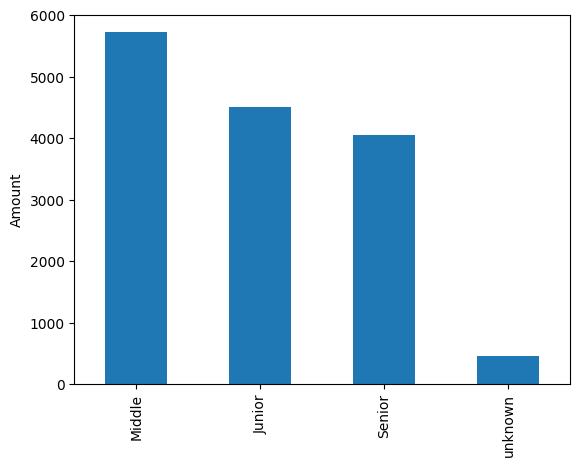

In [41]:
#plt.xlabel("Fig.3 Expert Background")
plt.ylabel("Amount")
#plt.title("Code Smell")
dataset['reviewer'].value_counts().plot.bar() #;
plt.show()

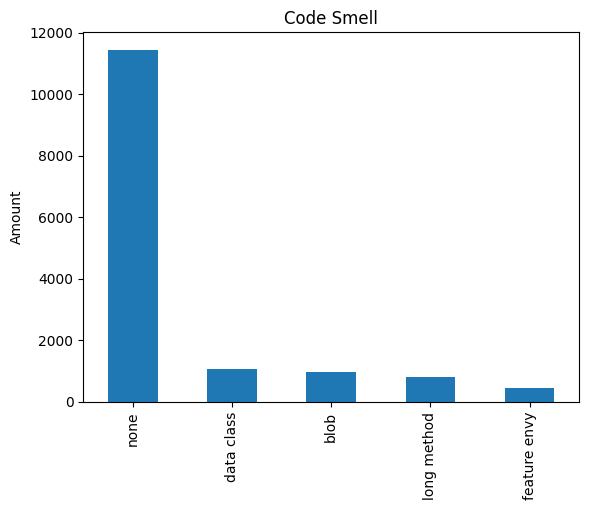

In [42]:
#plt.xlabel("Fig.1")
plt.ylabel("Amount")
plt.title("Code Smell")
dataset['smell'].value_counts().plot.bar() #;
plt.show()

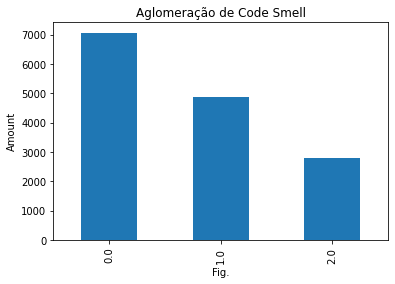

In [36]:
plt.xlabel("Fig.")
plt.ylabel("Amount")
plt.title("Aglomeração de Code Smell")
dataset['agglom_num'].value_counts().plot.bar() #;
plt.show()

In [43]:
##Quantidade de NAN
for col in dataset.columns:
    cont = dataset[col].isna().sum()
    print(f'{col}: {cont} ')

commit_hash: 0 
sample_id: 0 
reviewer_id: 0 
smell: 0 
severity: 0 
review_timestamp: 0 
type: 0 
code_name: 0 
repository: 0 
start_line: 0 
end_line: 0 
link: 0 
relevant: 0 
lines: 0 
agglom_num: 0 
agglom_list: 7063 
num_commits: 0 
reason: 14028 
NumberOfAccessedVariables: 14028 
CouplingDispersion: 14028 
ChangingClasses: 14037 
MethodLinesOfCode: 14028 
CyclomaticComplexity: 14028 
MaxNesting: 14028 
CouplingIntensity: 14028 
ParameterCount: 14028 
MaxCallChain: 14028 
ChangingMethods: 14037 
repeticoes: 14028 
arquivo: 14028 
reviewer_cod: 0 
reviewer: 0 


In [44]:
dataset.ChangingMethods.value_counts()
dataset.ChangingMethods.unique()

#dataset.repeticoes.unique()
#dataset['NumberOfAccessedVariables'].value_counts()


array([nan,  0.,  1.,  4.,  2., 10.,  3.,  8.,  7.,  6., 11., 19.,  5.])

In [45]:
#NAO
# primeira analise para amostras que tem dados vindos do organic
#dataset.fillna(0, inplace = True)
dataset = dataset.dropna()

In [46]:
dataset.shape

(702, 32)

In [47]:
dataset.smell.value_counts()
dataset.smell.unique()

array(['long method', 'feature envy'], dtype=object)

In [48]:
##Quantidade de NAN
for col in dataset.columns:
    cont = dataset[col].isna().sum()
    print(f'{col}: {cont} ')

commit_hash: 0 
sample_id: 0 
reviewer_id: 0 
smell: 0 
severity: 0 
review_timestamp: 0 
type: 0 
code_name: 0 
repository: 0 
start_line: 0 
end_line: 0 
link: 0 
relevant: 0 
lines: 0 
agglom_num: 0 
agglom_list: 0 
num_commits: 0 
reason: 0 
NumberOfAccessedVariables: 0 
CouplingDispersion: 0 
ChangingClasses: 0 
MethodLinesOfCode: 0 
CyclomaticComplexity: 0 
MaxNesting: 0 
CouplingIntensity: 0 
ParameterCount: 0 
MaxCallChain: 0 
ChangingMethods: 0 
repeticoes: 0 
arquivo: 0 
reviewer_cod: 0 
reviewer: 0 


In [49]:
dataset.head()

,commit_hash,sample_id,reviewer_id,smell,severity,review_timestamp,type,code_name,repository,start_line,...,CyclomaticComplexity,MaxNesting,CouplingIntensity,ParameterCount,MaxCallChain,ChangingMethods,repeticoes,arquivo,reviewer_cod,reviewer
39,a9c1a0661198d9ba37c1facd8385fe05d538c4ad,5840527,6,long method,minor,2019-03-27 10:45:41.280865,function,org.apache.el.parser.ELParser#DynamicExpression,git@github.com:apache/tomcat.git,140,...,1.0,0.0,3.0,0.0,3.0,0.0,2.0,download/tomcat_a9c1a0661198d9ba37c1facd8385fe...,,Junior
44,a9c1a0661198d9ba37c1facd8385fe05d538c4ad,5839980,7,feature envy,minor,2019-03-27 10:46:31.227874,function,org.apache.tomcat.util.descriptor.web.ContextR...,git@github.com:apache/tomcat.git,94,...,1.0,0.0,4.0,0.0,3.0,0.0,1.0,download/tomcat_a9c1a0661198d9ba37c1facd8385fe...,,Junior
47,a9c1a0661198d9ba37c1facd8385fe05d538c4ad,5855589,6,feature envy,minor,2019-03-27 10:47:09.381546,function,org.apache.catalina.ha.session.DeltaSession#en...,git@github.com:apache/tomcat.git,412,...,1.0,0.0,3.0,0.0,1.0,0.0,1.0,download/tomcat_a9c1a0661198d9ba37c1facd8385fe...,,Junior
85,4219d552349f8f7f3e6de34505b8a8ae9835f98b,5922177,6,feature envy,minor,2019-03-27 10:51:45.193555,function,org.apache.zeppelin.realm.jwt.KnoxJwtRealm#val...,git@github.com:apache/zeppelin.git,130,...,1.0,0.0,5.0,0.0,4.0,0.0,2.0,download/zeppelin_4219d552349f8f7f3e6de34505b8...,,Junior
94,07c3aaf3d723fb3144c0aedc0c2b655325df70e9,5939954,6,feature envy,major,2019-03-27 10:55:26.305339,function,org.apache.zookeeper.graph.JsonGenerator.JsonG...,git@github.com:apache/zookeeper.git,75,...,20.0,6.0,5.0,1.0,2.0,0.0,3.0,download/zookeeper_07c3aaf3d723fb3144c0aedc0c2...,,Junior


In [50]:
dataset.shape
# antes (14739, 28)


(702, 32)

In [51]:
# nao tenho mais blob
#dataset[['smell','NumberOfAccessedVariables']]
dataset[dataset['smell']=='blob'][['smell','NumberOfAccessedVariables']]

,smell,NumberOfAccessedVariables


In [52]:
# nao tenho mais data class
#dataset[['smell','NumberOfAccessedVariables']]
dataset[dataset['smell']=='data class'][['smell','NumberOfAccessedVariables']]

,smell,NumberOfAccessedVariables


In [53]:
#'long method', 'feature envy']
dataset[dataset['smell']=='feature envy'][['smell','NumberOfAccessedVariables']]
#dataset[dataset['smell']=='long method'][['smell','NumberOfAccessedVariables']]

,smell,NumberOfAccessedVariables
44,feature envy,6.0
47,feature envy,4.0
85,feature envy,6.0
94,feature envy,38.0
113,feature envy,10.0
...,...,...
14640,feature envy,23.0
14656,feature envy,10.0
14668,feature envy,7.0
14704,feature envy,3.0


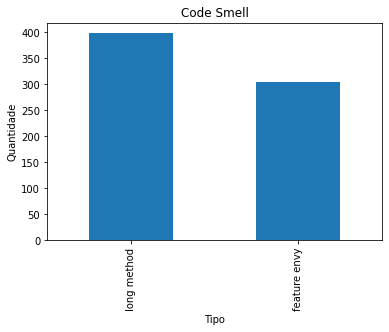

In [48]:
plt.xlabel("Tipo")
plt.ylabel("Quantidade")
plt.title("Code Smell")
dataset['smell'].value_counts().plot.bar() #;
plt.show()

In [54]:
dataset['smell'].value_counts()

long method     398
feature envy    304
Name: smell, dtype: int64

In [55]:
dataset['reviewer'].value_counts()

Middle     268
Junior     209
Senior     185
unknown     40
Name: reviewer, dtype: int64

# Removendo a coluna agglomeration

In [ ]:
###

# Codificando os nomes de smell e criando coluna label

In [56]:
df = dataset

In [57]:
sorted(df['smell'].unique())

['feature envy', 'long method']

In [66]:
# Import LabelEncoder
import sklearn 
from sklearn import preprocessing
modelo_label = preprocessing.LabelEncoder()
modelo_label.fit(sorted(df['smell'].unique()))

LabelEncoder()

In [63]:
df['label'] = modelo_label.fit_transform(df.smell)

In [64]:
sorted(df['label'].unique())

[0, 1]

In [67]:
# conferindo...
df.sample(10)

,commit_hash,sample_id,reviewer_id,smell,severity,review_timestamp,type,code_name,repository,start_line,...,MaxNesting,CouplingIntensity,ParameterCount,MaxCallChain,ChangingMethods,repeticoes,arquivo,reviewer_cod,reviewer,label
5215,351623a86924dab9c565e08e8cecfe151522c448,5602164,25,long method,major,2019-04-17 10:41:53.835501,function,org.apache.poi.xssf.model.TestCommentsTable#wr...,git@github.com:apache/poi.git,128,...,1.0,7.0,0.0,3.0,0.0,2.0,download/poi_351623a86924dab9c565e08e8cecfe151...,,Junior,1
10419,7a7c407ea41477aae8508bfe871b4e9a67e1b277,8653310,3,feature envy,minor,2019-08-01 23:50:13.947147,function,org.apache.ignite.internal.processors.query.h2...,git@github.com:apache/ignite.git,105,...,1.0,14.0,0.0,4.0,0.0,3.0,download/ignite_7a7c407ea41477aae8508bfe871b4e...,,Middle,0
9126,4131c6e30f2e0eb1feb85e0f7576531d4e830468,5790828,10,feature envy,minor,2019-07-24 11:04:57.054621,function,org.apache.tika.parser.microsoft.WordExtractor...,git@github.com:apache/tika.git,248,...,0.0,3.0,0.0,2.0,0.0,1.0,download/tika_4131c6e30f2e0eb1feb85e0f7576531d...,,Middle,0
14536,52293d20268de7c98833846ded2b70d6476773de,3942097,4,long method,major,2019-09-12 19:45:48.299469,function,org.apache.aries.spifly.statictool.Main.weaveD...,git@github.com:apache/aries.git,173,...,3.0,4.0,4.0,2.0,3.0,3.0,download/aries_52293d20268de7c98833846ded2b70d...,,Senior,1
8658,caced35327f6b6d6eeac2a13543f3c458e902101,4576061,13,long method,major,2019-07-23 15:20:49.365058,function,org.apache.fop.fo.flow.Leader#bind PropertyList,git@github.com:apache/fop.git,72,...,3.0,0.0,1.0,2.0,2.0,1.0,download/fop_caced35327f6b6d6eeac2a13543f3c458...,,Junior,1
13562,d21933b313aff812fe5188b57bf572a9ad649148,5952032,20,long method,minor,2019-09-04 08:08:40.109075,function,org.apache.openejb.core.interceptor.Reflection...,git@github.com:apache/tomee.git,153,...,1.0,0.0,1.0,1.0,0.0,1.0,download/tomee_d21933b313aff812fe5188b57bf572a...,,Senior,1
7930,a956ff77a8448e5f2c12f6695fec608348b5ab60,4062999,12,feature envy,minor,2019-07-19 12:28:54.528983,function,org.apache.beam.runners.dataflow.worker.Assign...,git@github.com:apache/beam.git,93,...,1.0,5.0,1.0,4.0,0.0,2.0,download/beam_a956ff77a8448e5f2c12f6695fec6083...,,Middle,0
7466,3f6e0265f5b476ff90a660397ce83992944142c4,6266221,3,long method,minor,2019-07-18 00:37:30.989048,function,org.eclipse.ice.tests.datastructures.MasterDet...,git@github.com:eclipse/ice.git,201,...,2.0,1.0,1.0,2.0,0.0,1.0,download/ice_3f6e0265f5b476ff90a660397ce839929...,,Middle,1
9290,7a7c407ea41477aae8508bfe871b4e9a67e1b277,8655527,4,feature envy,minor,2019-07-24 13:25:26.092528,function,org.apache.ignite.internal.processors.platform...,git@github.com:apache/ignite.git,185,...,0.0,5.0,4.0,2.0,4.0,2.0,download/ignite_7a7c407ea41477aae8508bfe871b4e...,,Senior,0
7438,310007cc1c7eb5415f93bed67d5553bc70980820,4336814,3,long method,minor,2019-07-18 00:35:18.713775,function,org.apache.directory.server.core.partition.imp...,git@github.com:apache/directory-server.git,174,...,2.0,0.0,0.0,1.0,0.0,1.0,download/directory-server_310007cc1c7eb5415f93...,,Middle,1


# Codificando os tipos de smell e criando coluna cod_type

# Nao foi considerado, pois para feature env e log method só tem um valor (function)

In [68]:
sorted(df['type'].unique())

['function']

In [69]:
#modelo_type = preprocessing.LabelEncoder()
#modelo_type.fit(sorted(df['type'].unique()))

In [70]:
#df['cod_type'] = modelo_type.fit_transform(df.type)

In [ ]:
#sorted(df['cod_type'].unique())

In [ ]:
# conferindo
#df.sample(10)

# Codificando as severidades de smell e criando coluna cod_severity

In [71]:
sorted(df['severity'].unique())

['critical', 'major', 'minor']

In [72]:
modelo_severity = preprocessing.LabelEncoder()
modelo_severity.fit(sorted(df['severity'].unique()))

LabelEncoder()

In [73]:
df['cod_severity'] = modelo_severity.fit_transform(df.severity)

In [74]:
sorted(df['cod_severity'].unique())

[0, 1, 2]

In [75]:
# conferindo...
df.sample(10)

,commit_hash,sample_id,reviewer_id,smell,severity,review_timestamp,type,code_name,repository,start_line,...,CouplingIntensity,ParameterCount,MaxCallChain,ChangingMethods,repeticoes,arquivo,reviewer_cod,reviewer,label,cod_severity
149,c5498c2ac562cd8a2fc79a6bb0446d291f05a201,6183429,7,feature envy,major,2019-03-27 11:07:12.693485,function,org.eclipse.che.ide.util.dom.DomUtils.getSibli...,git@github.com:eclipse/che.git,171,...,4.0,1.0,4.0,1.0,2.0,download/che_c5498c2ac562cd8a2fc79a6bb0446d291...,,Junior,0,1
973,3a0f309e2c9fdbbf7fb2d348be861528177f8555,7588699,12,feature envy,critical,2019-03-29 13:55:18.654152,function,org.springframework.context.annotation.Configu...,git@github.com:spring-projects/spring-framewor...,426,...,1.0,0.0,2.0,0.0,2.0,download/spring-framework_3a0f309e2c9fdbbf7fb2...,,Middle,0,0
10977,caced35327f6b6d6eeac2a13543f3c458e902101,4568919,3,long method,minor,2019-08-05 12:35:28.705123,function,org.apache.fop.fonts.truetype.OpenFont#readFon...,git@github.com:apache/fop.git,813,...,5.0,6.0,2.0,0.0,2.0,download/fop_caced35327f6b6d6eeac2a13543f3c458...,,Middle,1,2
9808,3a0f309e2c9fdbbf7fb2d348be861528177f8555,7588956,30,feature envy,major,2019-07-26 09:53:37.248526,function,org.springframework.web.servlet.support.BindSt...,git@github.com:spring-projects/spring-framewor...,96,...,6.0,0.0,2.0,0.0,2.0,download/spring-framework_3a0f309e2c9fdbbf7fb2...,,unknown,0,1
3048,470e5e9f5de9ba1b6149dec60e87d3a04270eda3,4436948,16,feature envy,minor,2019-04-05 13:12:40.065600,function,org.apache.falcon.entity.FeedHelper.getImportI...,git@github.com:apache/falcon.git,932,...,6.0,0.0,4.0,0.0,2.0,download/falcon_470e5e9f5de9ba1b6149dec60e87d3...,,Junior,0,2
9362,4bc79c9465abd00e29ff576c5f7a7517be632f5a,6905182,4,feature envy,major,2019-07-24 14:48:34.588918,function,com.google.android.exoplayer2.text.ttml.TtmlDe...,git@github.com:google/ExoPlayer.git,311,...,3.0,3.0,2.0,1.0,2.0,download/ExoPlayer_4bc79c9465abd00e29ff576c5f7...,,Senior,0,1
13137,44f8abd5c65c59e9d09f6ad14b3c825f145d8e4f,8560556,1,long method,critical,2019-08-30 12:03:16.084809,function,org.apache.hadoop.hbase.backup.impl.Incrementa...,git@github.com:apache/hbase.git,115,...,19.0,0.0,3.0,0.0,3.0,download/hbase_44f8abd5c65c59e9d09f6ad14b3c825...,,Middle,1,0
3991,2fa22bf360898dc8fd1408bfcc96e1c6aeaf9a53,8934300,20,long method,major,2019-04-12 13:07:03.993055,function,org.apache.hadoop.hive.ql.optimizer.calcite.co...,git@github.com:apache/hive.git,414,...,4.0,2.0,1.0,0.0,1.0,download/hive_2fa22bf360898dc8fd1408bfcc96e1c6...,,Senior,1,1
4779,3a0f309e2c9fdbbf7fb2d348be861528177f8555,7580470,20,long method,minor,2019-04-12 15:14:14.216803,function,org.springframework.core.ResolvableType.forTyp...,git@github.com:spring-projects/spring-framewor...,1394,...,11.0,0.0,2.0,0.0,2.0,download/spring-framework_3a0f309e2c9fdbbf7fb2...,,Senior,1,2
13812,6bf89e9c8804c8845ec4d38583dd33eea8256439,4395308,4,feature envy,minor,2019-09-08 21:38:22.616523,function,org.apache.cxf.wsn.client.CreatePullPoint#crea...,git@github.com:apache/cxf.git,58,...,5.0,0.0,2.0,1.0,1.0,download/cxf_6bf89e9c8804c8845ec4d38583dd33eea...,,Senior,0,2


# Codificando os tipos de relevancia e criando coluna cod_relevant

In [76]:
print(f"vazios:{df['relevant'].isna().sum()}")
df['relevant'].value_counts()

vazios:0


1      617
0       47
0,5     38
Name: relevant, dtype: int64

In [77]:
#sorted(dataset['relevant'].unique())
#sorted(dataset['smell'].unique())
df['relevant'].unique()

array(['1', '0,5', '0'], dtype=object)

In [78]:
modelo_relevant = preprocessing.LabelEncoder()
modelo_relevant.fit(sorted(df['relevant'].unique()))

LabelEncoder()

In [79]:
df['cod_relevant'] = modelo_relevant.fit_transform(df.relevant)

In [80]:
df.sample(10)

,commit_hash,sample_id,reviewer_id,smell,severity,review_timestamp,type,code_name,repository,start_line,...,ParameterCount,MaxCallChain,ChangingMethods,repeticoes,arquivo,reviewer_cod,reviewer,label,cod_severity,cod_relevant
10033,a9c1a0661198d9ba37c1facd8385fe05d538c4ad,5855589,13,feature envy,critical,2019-07-26 12:55:24.795178,function,org.apache.catalina.ha.session.DeltaSession#en...,git@github.com:apache/tomcat.git,412,...,0.0,1.0,0.0,1.0,download/tomcat_a9c1a0661198d9ba37c1facd8385fe...,,Junior,0,0,2
14053,210e380df3ca5c74c8c2fa09e7fe1cffdb87e20a,4549169,4,feature envy,critical,2019-09-12 08:07:30.737806,function,org.apache.fineract.portfolio.savings.data.Dep...,git@github.com:apache/fineract.git,413,...,3.0,5.0,2.0,3.0,download/fineract_210e380df3ca5c74c8c2fa09e7fe...,,Senior,0,0,2
10372,e8c7b3f1ff14b2a1df64321c6992b796cae7d732,3717906,3,long method,minor,2019-08-01 23:34:22.668842,function,android.taobao.atlas.framework.bundlestorage.B...,git@github.com:alibaba/atlas.git,301,...,1.0,2.0,0.0,2.0,download/atlas_e8c7b3f1ff14b2a1df64321c6992b79...,,Middle,1,2,2
3704,7fba4b29d653747a9ed038d282954a44fea3031c,5761917,7,feature envy,minor,2019-04-10 09:42:59.653743,function,org.apache.sysml.runtime.compress.cocode.Plann...,git@github.com:apache/systemml.git,116,...,9.0,2.0,4.0,2.0,download/systemml_7fba4b29d653747a9ed038d28295...,,Junior,0,2,2
11828,4bc79c9465abd00e29ff576c5f7a7517be632f5a,6905182,3,long method,critical,2019-08-06 16:32:04.301189,function,com.google.android.exoplayer2.text.ttml.TtmlDe...,git@github.com:google/ExoPlayer.git,311,...,3.0,2.0,1.0,2.0,download/ExoPlayer_4bc79c9465abd00e29ff576c5f7...,,Middle,1,0,2
10202,4c4400b98a5a8493cfb9e5dbb21c97175f433a62,5497076,4,feature envy,major,2019-07-26 20:29:02.276735,function,org.apache.qpid.server.security.access.config....,git@github.com:apache/qpid-broker-j.git,113,...,2.0,1.0,1.0,2.0,download/qpid-broker-j_4c4400b98a5a8493cfb9e5d...,,Senior,0,1,2
6430,4c4400b98a5a8493cfb9e5dbb21c97175f433a62,5497076,3,long method,critical,2019-05-20 10:19:27.081209,function,org.apache.qpid.server.security.access.config....,git@github.com:apache/qpid-broker-j.git,113,...,2.0,4.0,3.0,2.0,download/qpid-broker-j_4c4400b98a5a8493cfb9e5d...,,Middle,1,0,2
14298,caced35327f6b6d6eeac2a13543f3c458e902101,4566202,20,long method,minor,2019-09-12 09:51:50.961140,function,org.apache.fop.svg.AbstractFOPImageElementBrid...,git@github.com:apache/fop.git,70,...,0.0,1.0,1.0,2.0,download/fop_caced35327f6b6d6eeac2a13543f3c458...,,Senior,1,2,2
10096,8fd839e8b73e40bd2dfd14f331b587431bd35a66,7850192,13,feature envy,minor,2019-07-26 13:26:24.711926,function,org.apache.geode.internal.cache.Oplog#recoverD...,git@github.com:apache/geode.git,1448,...,0.0,3.0,0.0,3.0,download/geode_8fd839e8b73e40bd2dfd14f331b5874...,,Junior,0,2,2
11312,2bc4779a1e6aabe638101fc8b0e28cd1963d6b13,3877118,3,long method,minor,2019-08-05 21:38:23.193221,function,org.apache.ambari.server.controller.AmbariMana...,git@github.com:apache/ambari.git,4555,...,1.0,2.0,1.0,1.0,download/ambari_2bc4779a1e6aabe638101fc8b0e28c...,,Middle,1,2,2


# Codificando o reviewer e criando cod_reviewer

In [81]:
modelo_reviewer = preprocessing.LabelEncoder()
modelo_reviewer.fit(sorted(df['reviewer'].unique()))
df['cod_reviewer'] = modelo_reviewer.fit_transform(df.reviewer)

In [82]:
df['cod_reviewer'].value_counts()

1    268
0    209
2    185
3     40
Name: cod_reviewer, dtype: int64

# Verificando o dataset como ficou

In [83]:
print(df.shape)
df.describe()
df.columns

(702, 36)


Index(['commit_hash', 'sample_id', 'reviewer_id', 'smell', 'severity',
       'review_timestamp', 'type', 'code_name', 'repository', 'start_line',
       'end_line', 'link', 'relevant', 'lines', 'agglom_num', 'agglom_list',
       'num_commits', 'reason', 'NumberOfAccessedVariables',
       'CouplingDispersion', 'ChangingClasses', 'MethodLinesOfCode',
       'CyclomaticComplexity', 'MaxNesting', 'CouplingIntensity',
       'ParameterCount', 'MaxCallChain', 'ChangingMethods', 'repeticoes',
       'arquivo', 'reviewer_cod', 'reviewer', 'label', 'cod_severity',
       'cod_relevant', 'cod_reviewer'],
      dtype='object')

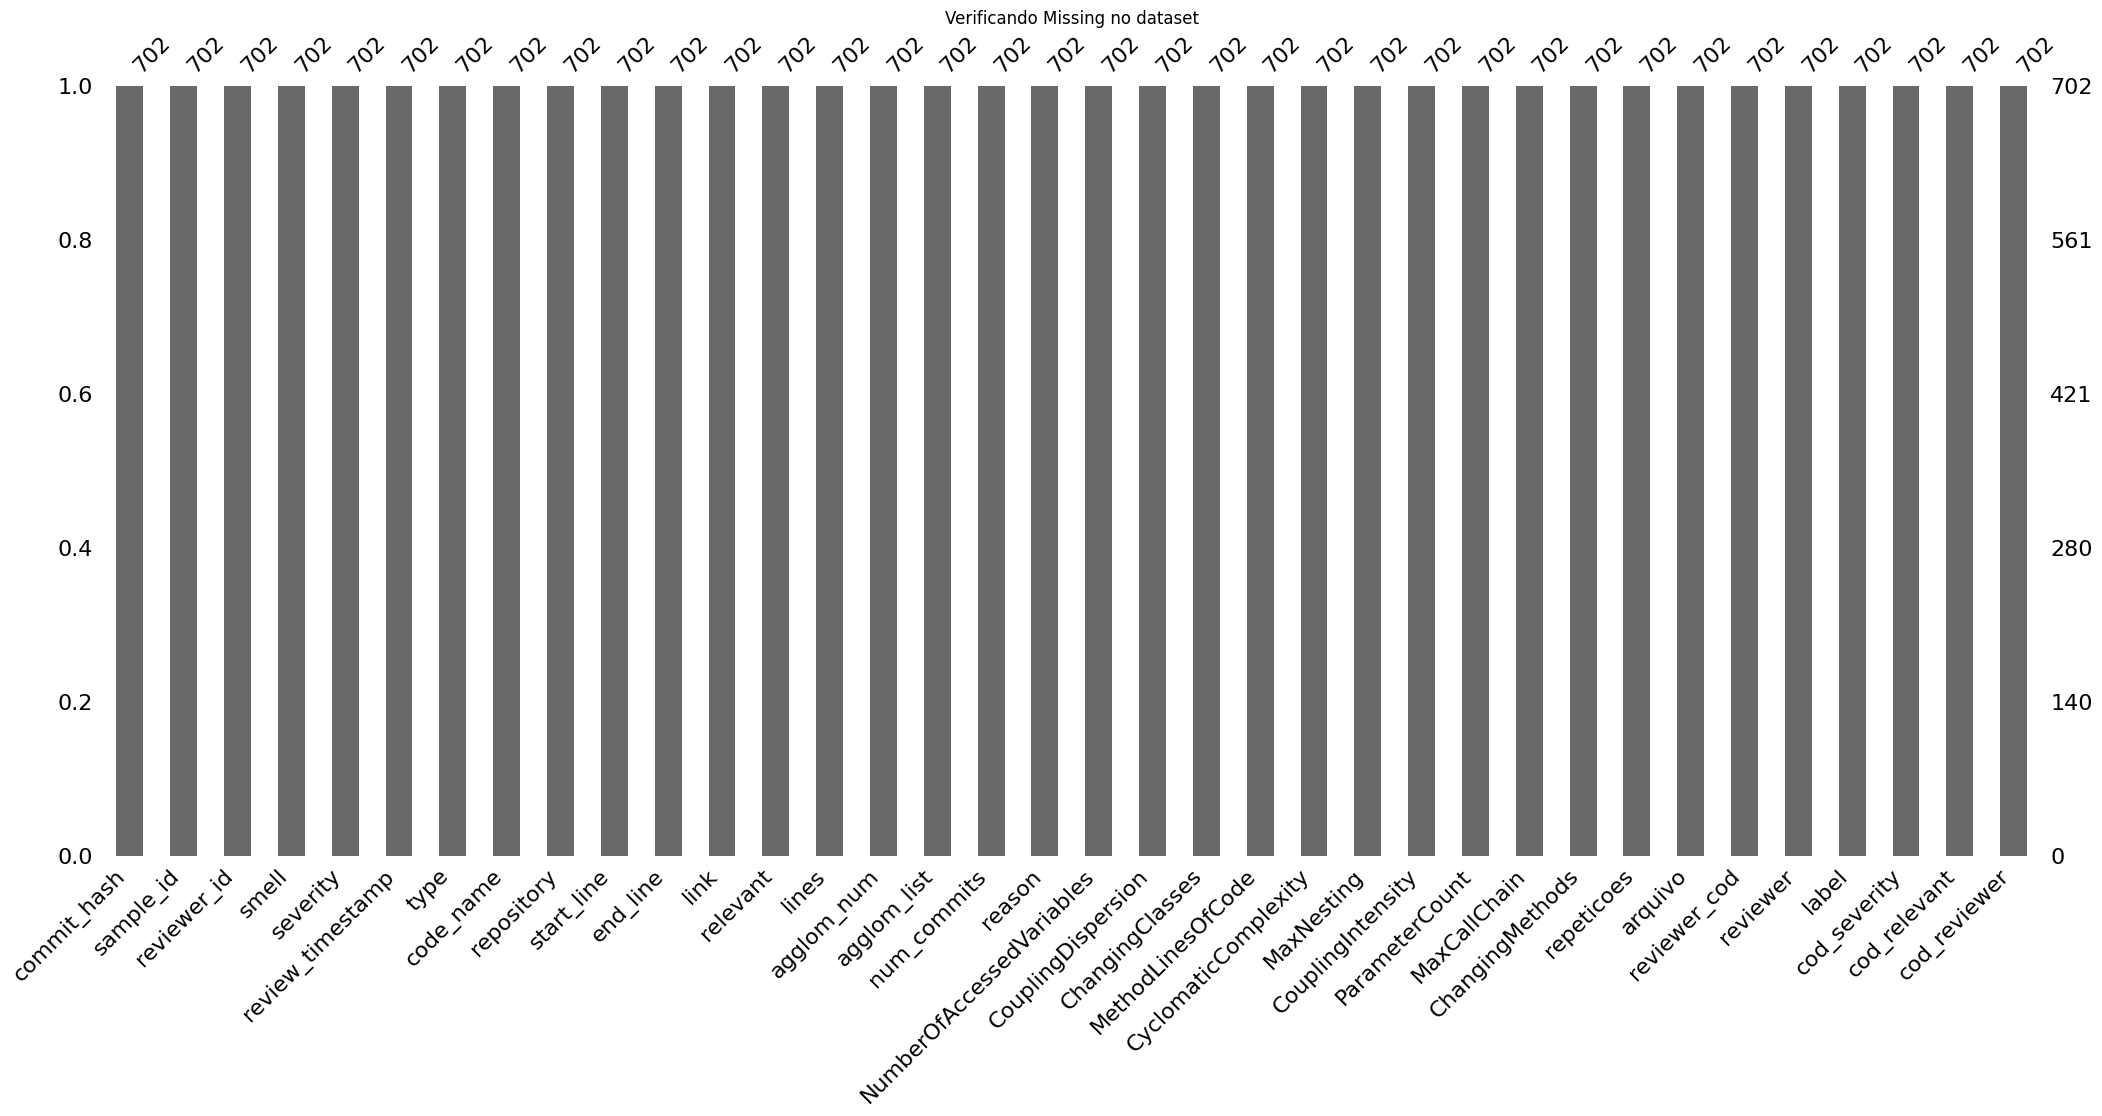

In [85]:
# olhando se ficou algum missing # start line e end line com nan nao representa problema.
import missingno
plt.title("Verificando Missing no dataset")
missingno.bar(df)
plt.savefig("Base Limpa - Missing.svg")
plt.show()

# conferindo...

In [86]:
df[['smell','label']]

,smell,label
39,long method,1
44,feature envy,0
47,feature envy,0
85,feature envy,0
94,feature envy,0
...,...,...
14704,feature envy,0
14705,long method,1
14706,feature envy,0
14712,long method,1


# PROSSEGUIR DAQUI

**Primeira análise**# Fazendo somente com as informações do MLCQ

In [87]:
df.columns

Index(['commit_hash', 'sample_id', 'reviewer_id', 'smell', 'severity',
       'review_timestamp', 'type', 'code_name', 'repository', 'start_line',
       'end_line', 'link', 'relevant', 'lines', 'agglom_num', 'agglom_list',
       'num_commits', 'reason', 'NumberOfAccessedVariables',
       'CouplingDispersion', 'ChangingClasses', 'MethodLinesOfCode',
       'CyclomaticComplexity', 'MaxNesting', 'CouplingIntensity',
       'ParameterCount', 'MaxCallChain', 'ChangingMethods', 'repeticoes',
       'arquivo', 'reviewer_cod', 'reviewer', 'label', 'cod_severity',
       'cod_relevant', 'cod_reviewer'],
      dtype='object')

In [88]:
# criada coluna hora, onde tem HH do review_timestamp
func_hora = lambda x: x.split(" ", 1)[1].split(":",1)[0]
df['hora'] = df.review_timestamp.apply(func_hora)
df['hora'] = df['hora'].astype(int)

In [89]:
# criada coluna para codificar a hora, sendo 1 para fora do horário regular e 
# 0 para horário regular 
df['cod_hora'] = 0
df['cod_hora'] = np.where(df['hora'] >= 18, 1,0)
df['cod_hora'] = np.where(df['hora'] <=  8, 1,0)


In [90]:
df['cod_hora'].value_counts()

0    605
1     97
Name: cod_hora, dtype: int64

In [91]:
df.head()

,commit_hash,sample_id,reviewer_id,smell,severity,review_timestamp,type,code_name,repository,start_line,...,repeticoes,arquivo,reviewer_cod,reviewer,label,cod_severity,cod_relevant,cod_reviewer,hora,cod_hora
39,a9c1a0661198d9ba37c1facd8385fe05d538c4ad,5840527,6,long method,minor,2019-03-27 10:45:41.280865,function,org.apache.el.parser.ELParser#DynamicExpression,git@github.com:apache/tomcat.git,140,...,2.0,download/tomcat_a9c1a0661198d9ba37c1facd8385fe...,,Junior,1,2,2,0,10,0
44,a9c1a0661198d9ba37c1facd8385fe05d538c4ad,5839980,7,feature envy,minor,2019-03-27 10:46:31.227874,function,org.apache.tomcat.util.descriptor.web.ContextR...,git@github.com:apache/tomcat.git,94,...,1.0,download/tomcat_a9c1a0661198d9ba37c1facd8385fe...,,Junior,0,2,2,0,10,0
47,a9c1a0661198d9ba37c1facd8385fe05d538c4ad,5855589,6,feature envy,minor,2019-03-27 10:47:09.381546,function,org.apache.catalina.ha.session.DeltaSession#en...,git@github.com:apache/tomcat.git,412,...,1.0,download/tomcat_a9c1a0661198d9ba37c1facd8385fe...,,Junior,0,2,2,0,10,0
85,4219d552349f8f7f3e6de34505b8a8ae9835f98b,5922177,6,feature envy,minor,2019-03-27 10:51:45.193555,function,org.apache.zeppelin.realm.jwt.KnoxJwtRealm#val...,git@github.com:apache/zeppelin.git,130,...,2.0,download/zeppelin_4219d552349f8f7f3e6de34505b8...,,Junior,0,2,2,0,10,0
94,07c3aaf3d723fb3144c0aedc0c2b655325df70e9,5939954,6,feature envy,major,2019-03-27 10:55:26.305339,function,org.apache.zookeeper.graph.JsonGenerator.JsonG...,git@github.com:apache/zookeeper.git,75,...,3.0,download/zookeeper_07c3aaf3d723fb3144c0aedc0c2...,,Junior,0,1,2,0,10,0


In [92]:
df.columns
#['reviewer_id','severity','review_timestamp','repository', 'start_line',
#       'end_line', 'link', 'relevant', 'lines', 'num_commits', 'reason',
#       'NumberOfAccessedVariables', 'CouplingDispersion', 'ChangingClasses',
#       'MethodLinesOfCode', 'CyclomaticComplexity', 'MaxNesting',
#       'CouplingIntensity', 'ParameterCount', 'MaxCallChain',
#       'ChangingMethods', 'repeticoes', 'arquivo', 'label', 'cod_severity',
#       'cod_relevant'],

Index(['commit_hash', 'sample_id', 'reviewer_id', 'smell', 'severity',
       'review_timestamp', 'type', 'code_name', 'repository', 'start_line',
       'end_line', 'link', 'relevant', 'lines', 'agglom_num', 'agglom_list',
       'num_commits', 'reason', 'NumberOfAccessedVariables',
       'CouplingDispersion', 'ChangingClasses', 'MethodLinesOfCode',
       'CyclomaticComplexity', 'MaxNesting', 'CouplingIntensity',
       'ParameterCount', 'MaxCallChain', 'ChangingMethods', 'repeticoes',
       'arquivo', 'reviewer_cod', 'reviewer', 'label', 'cod_severity',
       'cod_relevant', 'cod_reviewer', 'hora', 'cod_hora'],
      dtype='object')

In [ ]:
#df.repository.value_counts()

In [93]:
## Mantendo somente os atributos do MLCQ
## mantendo somente as linhas que tiveram match com o organic para que futura comparação seja feita com os mesmos dados 
## df_MLCQ = df[['label','reviewer_id','cod_severity','review_timestamp','lines','cod_relevant']] # + newcolumns]

df_MLCQ = df[['agglom_num','cod_reviewer','lines','num_commits','label','cod_severity','cod_relevant', 'cod_hora']]
print(df_MLCQ.shape)
df_MLCQ.sample(10)

(702, 8)


,agglom_num,cod_reviewer,lines,num_commits,label,cod_severity,cod_relevant,cod_hora
9520,2.0,1,39,192,1,1,2,0
9990,2.0,0,26,32,1,2,2,0
47,1.0,0,7,68,0,2,2,0
6245,2.0,1,92,14,0,2,2,0
7369,2.0,1,29,120,0,2,2,1
803,2.0,1,16,6,0,1,1,0
9281,2.0,2,60,72,1,1,2,0
3807,2.0,0,40,10,1,1,0,0
8108,1.0,1,46,32,1,2,2,0
8861,2.0,2,39,192,0,2,2,0


In [94]:
# ainda sem conjunto de validacao
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_MLCQ.loc[:,df_MLCQ.columns != 'label'], 
                                                    df_MLCQ['label'], test_size=0.2, 
                                                    stratify=df_MLCQ.label)

In [95]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(561, 7)
(141, 7)
(561,)
(141,)


In [96]:
# Scaling the Train and Test feature set 
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
### ATENCAO: AINDA FALTA FAZER A NORMALZICAO ABAIXO
### Fazer aqui a normalizacao

#x_train_norm = x_train
#x_test_norm = x_test

# Funcoes auxiliares

In [97]:
## Plota a matriz de confusão
def matriz_confusao(y_pred, y_test,classes):
    confMatrix = confusion_matrix(y_pred, y_test)

    ax = plt.subplot()
    sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap='twilight', linewidths=1, linecolor='black')
    plt.xlabel('Real')
    plt.ylabel('Previsto')
    plt.title('Matriz de Confusão')

    # Colocar os nomes
    ax.xaxis.set_ticklabels(classes)
    ax.yaxis.set_ticklabels(classes)
    plt.show()

In [98]:
from sklearn.metrics import accuracy_score, cohen_kappa_score
def print_indicadores(y_pred, y_test):
    print()
    print(f"Acurácia:\t{accuracy_score(y_pred, y_test):.2f}")
    print(f"Kappa:\t\t{cohen_kappa_score(y_pred, y_test):.2f}", )
    print()

# - 1 KNN com gridsearch

In [99]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [100]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'n_neighbors': [3,5,7,11,15,19],
    'weights' : ['uniform','distance'],
    'metric'  : ['euclidean','manhattan']
}

In [101]:
gs = GridSearchCV(KNeighborsClassifier(),grid_params,verbose = 1, cv = 3, n_jobs = -1)

In [102]:
knn = gs.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [103]:
## imprimindo informacoes do fit
print(f'Melhor modelo:  {knn.best_score_}')
print(f'Hiperparametros:{knn.best_params_}')
print(f'Estimators:     {knn.best_estimator_}')
print(f'Id:             {knn.best_index_}')

Melhor modelo:  0.7254901960784315
Hiperparametros:{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Estimators:     KNeighborsClassifier(metric='manhattan', n_neighbors=7)
Id:             16


In [104]:
final_model = knn.best_estimator_

In [105]:
y_test_predicted_knn = final_model.predict(x_test_scaled)
y_test_predicted_knn_indexes = y_test_predicted_knn
y_test_indexes = y_test.values

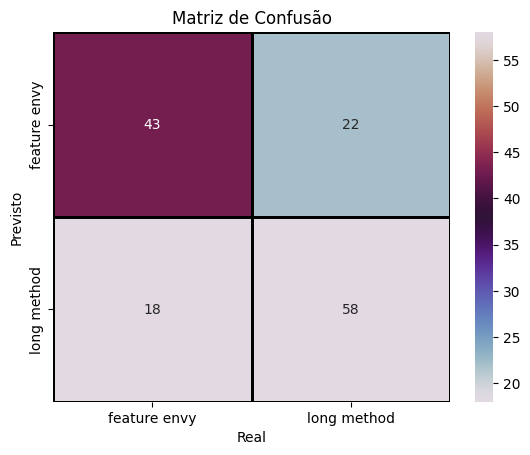

In [106]:
matriz_confusao(y_test_predicted_knn_indexes, y_test_indexes,list(modelo_label.inverse_transform([0, 1])))

In [107]:
print_indicadores(y_test_predicted_knn_indexes, y_test_indexes)


Acurácia:	0.72
Kappa:		0.43



# 2 RF com grid search

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
grid_params = {
    'min_samples_leaf': [3,5,10,15]
}

In [109]:
gs = GridSearchCV(RandomForestClassifier(random_state=seed),grid_params,verbose = 1, cv = 3, n_jobs = -1)
#a

In [110]:
RF = gs.fit(x_train, y_train)
#b

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [111]:
final_model = RF.best_estimator_
#c

In [112]:
# Previsão
# aplicando o modelo na base de teste
y_test_predicted_RF = final_model.predict(x_test)
y_test_predicted_RF_indexes = y_test_predicted_RF
y_test_indexes = y_test.values

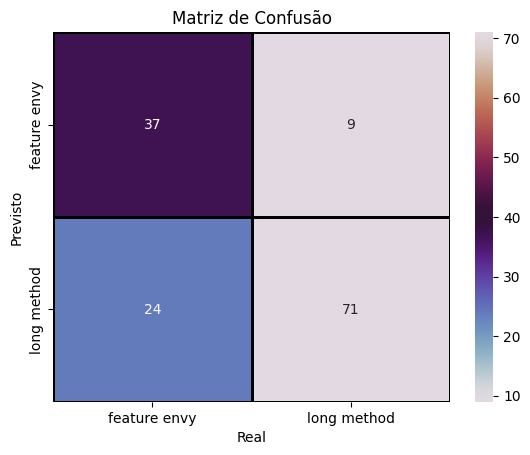

In [113]:
matriz_confusao(y_test_predicted_RF_indexes, y_test_indexes,list(modelo_label.inverse_transform([0, 1])))

In [114]:
print_indicadores(y_test_predicted_RF_indexes, y_test_indexes)


Acurácia:	0.77
Kappa:		0.51



# 2.1 Melhorando o RF

Nao melhorou

In [115]:
# Remove as features que não foram consideradas importantes no modelo
feature_imp = zip(df_MLCQ.columns.values, RF.best_estimator_.feature_importances_)
features = [val[0] for val in list(feature_imp) if val[1] > 0.02]
features

['agglom_num', 'cod_reviewer', 'lines', 'num_commits', 'label']

In [116]:
df_MLCQ_cleanRF = df_MLCQ[features]
df_MLCQ_cleanRF.head()


,agglom_num,cod_reviewer,lines,num_commits,label
39,1.0,0,29,68,1
44,2.0,0,28,68,0
47,1.0,0,7,68,0
85,2.0,0,27,27,0
94,2.0,0,139,22,0


In [117]:
x_trainRF, x_testRF, y_trainRF, y_testRF = train_test_split(df_MLCQ_cleanRF.loc[:,df_MLCQ_cleanRF.columns != 'label'], 
                                                    df_MLCQ_cleanRF['label'], test_size=0.2, 
                                                    stratify=df_MLCQ_cleanRF.label)

In [118]:
RF_clean_model = gs.fit(x_trainRF, y_trainRF)
#b

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [119]:
final_model = RF_clean_model.best_estimator_
#c

In [120]:
# Previsão
# aplicando o modelo na base de teste
y_test_predicted_RF = final_model.predict(x_testRF)
y_test_predicted_RF_indexes = y_test_predicted_RF
y_test_indexes = y_testRF.values

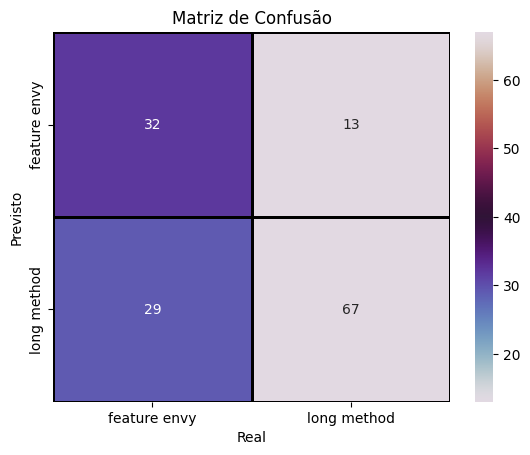

In [121]:
matriz_confusao(y_test_predicted_RF_indexes, y_test_indexes,list(modelo_label.inverse_transform([0, 1])))

In [122]:
print_indicadores(y_test_predicted_RF_indexes, y_test_indexes)


Acurácia:	0.70
Kappa:		0.37



# 3 Regressao Logistica

In [123]:
#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)

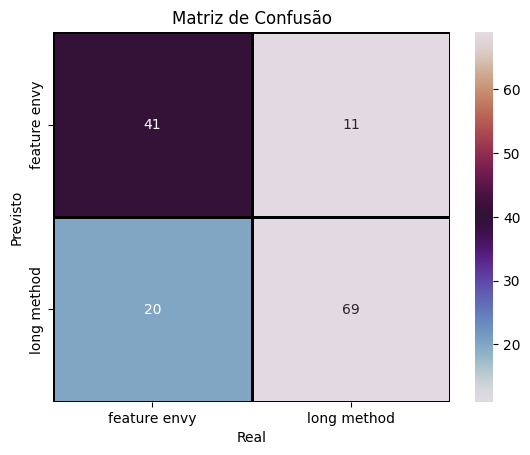


Acurácia:	0.78
Kappa:		0.54



In [125]:
from sklearn.linear_model import LogisticRegression
random_state = 10

LR = LogisticRegression(random_state=random_state)
LR.fit(x_train_scaled, y_train)

y_test_predicted_LR = LR.predict(x_test_scaled)
y_test_predicted_LR_indexes = y_test_predicted_LR
y_test_indexes = y_test.values


matriz_confusao(y_test_predicted_LR_indexes, y_test_indexes,list(modelo_label.inverse_transform([0, 1])))
print_indicadores(y_test_predicted_LR_indexes, y_test)

SVM - Classificacao - Com Grid Search

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [127]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(x_train_scaled)
#X_test_scaled = scaler.transform(x_test_scaled)

In [128]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [129]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [130]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

Best score for training data: 0.7485303413400758 

Best C: 1000 

Best Kernel: linear 

Best Gamma: scale 



In [131]:
final_model = svm_model.best_estimator_

In [132]:
y_test_predicted_knn = final_model.predict(x_test_scaled)
y_test_predicted_knn_indexes = y_test_predicted_knn
y_test_indexes = y_test.values

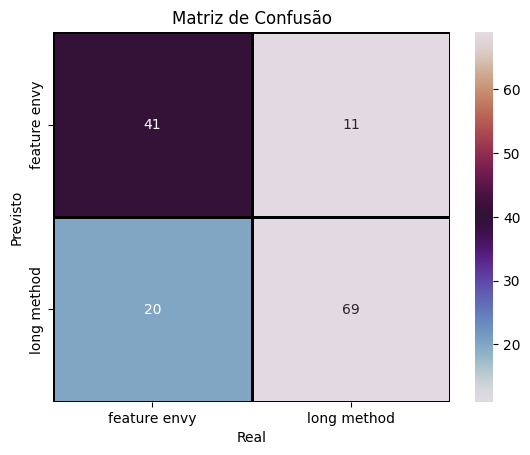

In [133]:
matriz_confusao(y_test_predicted_knn_indexes, y_test_indexes,list(modelo_label.inverse_transform([0, 1])))


In [134]:
print_indicadores(y_test_predicted_knn_indexes, y_test)


Acurácia:	0.78
Kappa:		0.54

